In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
import xarray as xr
import copy
import os
import sys

import metrics
sys.path.append(os.path.realpath('../split-data/'))
import return_period_tools as tools

import random

import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
xr.__version__

'0.16.1'

In [4]:
lstm_directory = '/home/gsnearing/projects/mclstm_paper/experiment/runs/lstm/nwm_training/'

with open(lstm_directory+'ensemble_results.p', 'rb') as fb:
    lstm_ensemble = pkl.load(fb)
with open(lstm_directory+'lstm_nwm_training_1_2405_022945/test/model_epoch030/test_results.p', 'rb') as fb:
    lstm_1 = pkl.load(fb)
with open(lstm_directory+'lstm_nwm_training_2_2305_221349/test/model_epoch030/test_results.p', 'rb') as fb:
    lstm_2 = pkl.load(fb)
with open(lstm_directory+'lstm_nwm_training_3_2405_105551/test/model_epoch030/test_results.p', 'rb') as fb:
    lstm_3 = pkl.load(fb)
    
    
sac_directory = '/home/jmframe/data/sacsma_camels_daymet/'

with open(sac_directory+'ensemble_means_sac_for_mc_paper_nwm.pkl', 'rb') as fb:
    sac_ensemble = pkl.load(fb)
with open(sac_directory+'single_value_sac_for_mc_paper_nwm.pkl', 'rb') as fb:
    sac_1 = pkl.load(fb)
    
    
range_for_analysis = {'time_split1': [1989,1999],'time_split2': [1996, 2014],'return_period_split':[1996, 2014]}

In [5]:
basin_list = list(sac_ensemble.keys())

In [6]:
# Convert flow to   CFS mm -> ft     km^2 -> ft^2    hr->s
conversion_factor = 0.00328084 * 10763910.41671 / 3600 / 24

In [7]:
# Get a list of all the basins in the analysis
#basin_list = list(lstm_results_time_split.keys())

# Camels attributes with RI information
dataName = '../data/camels_attributes.csv'
# load the data with pandas
pd_attributes = pd.read_csv(dataName, sep=',', index_col='gauge_id')

# Add the basin ID as a 8 element string with a leading zero if neccessary
basin_id_str = []
for a in pd_attributes.index.values:
    basin_id_str.append(str(a).zfill(8))
pd_attributes['basin_id_str'] = basin_id_str

01350080
skipping basin 01350080 because of missing observations
01123000
skipping basin 01123000 because of missing observations
01411300
01144000
01057000
01139800
01187300
skipping basin 01187300 because of missing observations
01170100
01169000
01073000
01415000
skipping basin 01415000 because of missing observations
01466500
01350140
skipping basin 01350140 because of missing observations
01139000
01047000


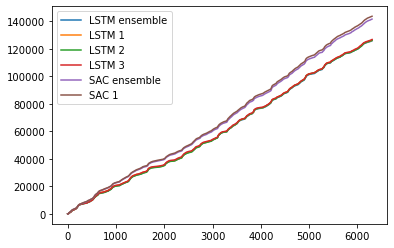

01142500
01484100
01137500
01162500
01413500
skipping basin 01413500 because of missing observations
01052500
01451800
01439500
01435000
skipping basin 01435000 because of missing observations
01078000
01440000
01055000


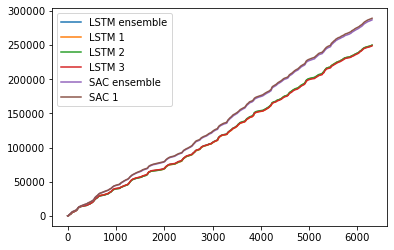

01195100
skipping basin 01195100 because of missing observations
01054200
01440400
01181000
01423000
skipping basin 01423000 because of missing observations
01022500
01365000
skipping basin 01365000 because of missing observations
01134500
01350000
skipping basin 01350000 because of missing observations
01434025
skipping basin 01434025 because of missing observations
01031500
01333000
01414500
skipping basin 01414500 because of missing observations
01516500
01491000
01518862


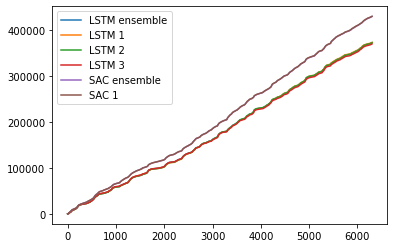

01543000
01487000
01539000
01532000
01542810
01510000
skipping basin 01510000 because of missing observations
01548500
01544500
01545600
01549500
01543500


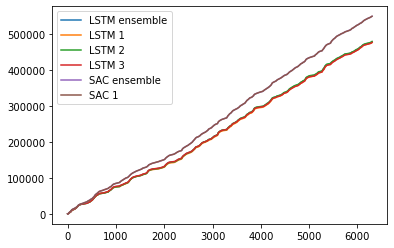

01547700
01550000
01586610
01583500
01568000
01552500
01591400
01557500
01580000
01552000


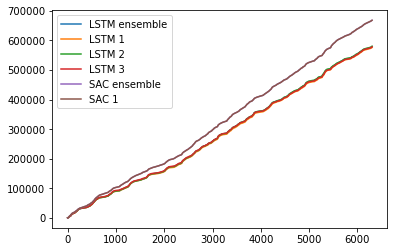

01596500
01632900
skipping basin 01632900 because of missing observations
01606500
skipping basin 01606500 because of missing observations
01638480
01639500
01567500
01594950
01605500
skipping basin 01605500 because of missing observations
01632000
skipping basin 01632000 because of missing observations
01634500
01644000
01664000
01666500
01667500


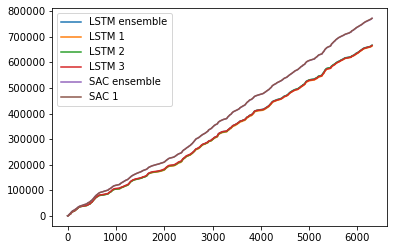

01669000
01669520
02011400
02013000
02014000
02015700
02016000
02017500
02028500
02018000


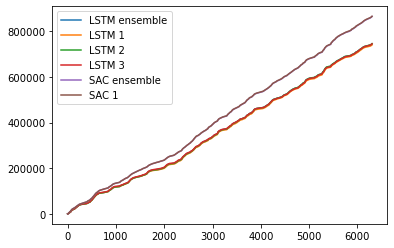

02038850
02027000
02027500
02046000
02051500
02055100
02056900
02059500
02053200
02053800


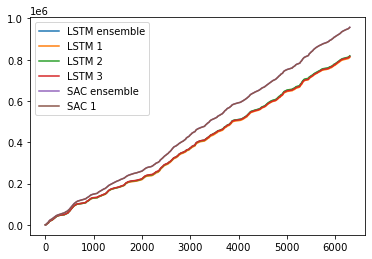

02064000
02065500
02069700
02070000
02074500
02081500
02092500
02077200
02082950
02096846


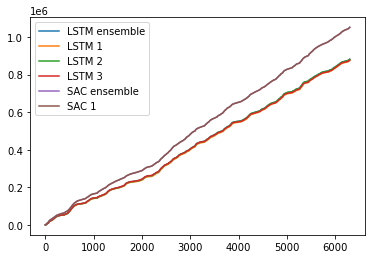

02102908
02112360
02108000
02111180
02111500
skipping basin 02111500 because of missing observations
02118500
02112120
02125000
skipping basin 02125000 because of missing observations
02128000
02137727
02140991
02143000


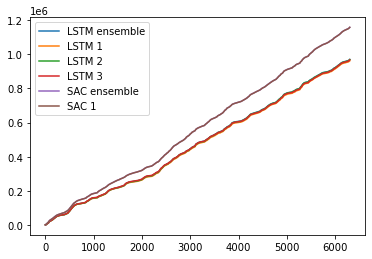

02143040
02152100
02149000
02177000
02193340
02196000
skipping basin 02196000 because of missing observations
02198100
02178400
skipping basin 02178400 because of missing observations
02202600
skipping basin 02202600 because of missing observations
02212600
02215100
02221525
02245500


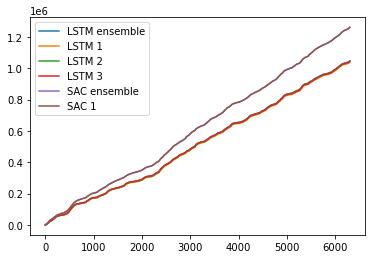

02216180
02296500
02231000
02246000
02297155
02297310
02298123
02298608
02299950
02342933
skipping basin 02342933 because of missing observations
02349900


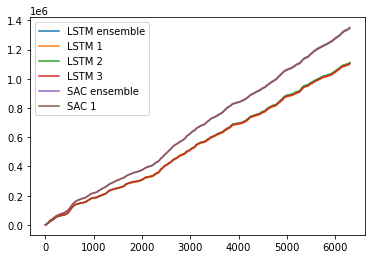

02361000
02300700
02350900
02363000
02372250
02369800
02374500
02371500
02384540
02381600


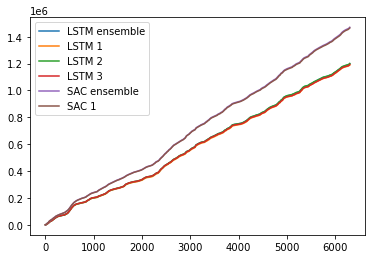

02395120
02415000
02427250
02430085
02464000
02450250
02464360
02465493
02472000
02479155


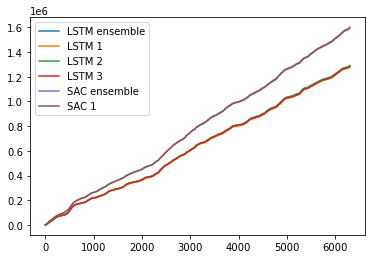

02469800
02472500
02479300
02481000
02479560
02481510
03010655
03011800
03028000
03021350


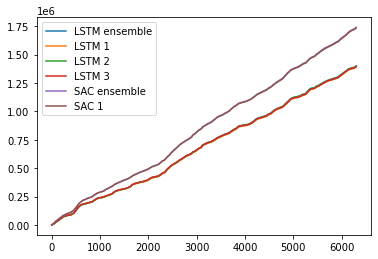

03015500
03026500
03049000
03050000
skipping basin 03050000 because of missing observations
03049800
03069500
skipping basin 03069500 because of missing observations
03076600
03070500
skipping basin 03070500 because of missing observations
03078000
03140000
03144000
03173000
03170000


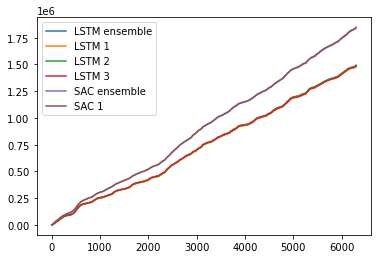

03237500
03180500
skipping basin 03180500 because of missing observations
03186500
skipping basin 03186500 because of missing observations
03237280
03182500
skipping basin 03182500 because of missing observations
03238500
skipping basin 03238500 because of missing observations
03241500
03280700
skipping basin 03280700 because of missing observations
03285000
skipping basin 03285000 because of missing observations
03281500
skipping basin 03281500 because of missing observations
03291780
03338780
03340800
skipping basin 03340800 because of missing observations
03346000
03364500
skipping basin 03364500 because of missing observations
03366500
03368000
skipping basin 03368000 because of missing observations
03384450
03455500
03456500


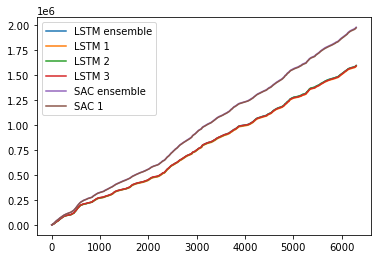

03439000
03460000
03471500
03463300
03473000
03498500
03488000
03479000
03500000
03500240


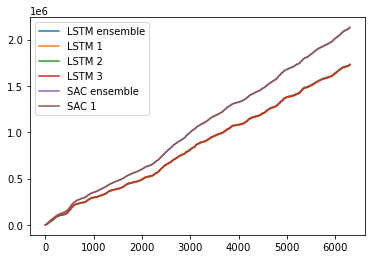

03574500
03504000
03592718
skipping basin 03592718 because of missing observations
03604000
04015330
04024430
04027000
04040500
04043050
04045500
04057800


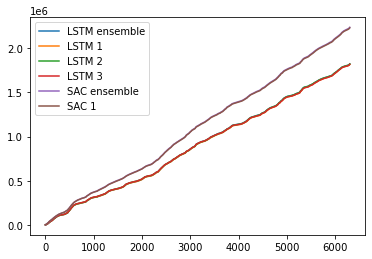

04057510
04059500
04063700
04074950
04122200
04105700
04115265
04127918
skipping basin 04127918 because of missing observations
04122500
04127997
04161580


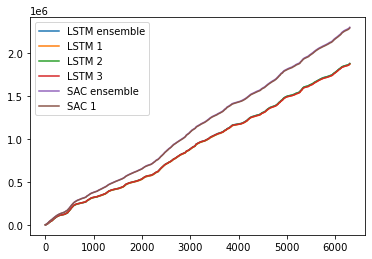

04185000
04196800
04197100
04197170
skipping basin 04197170 because of missing observations
04213000
04213075
04221000
04216418
04224775
04233000
skipping basin 04233000 because of missing observations
04256000
04296000


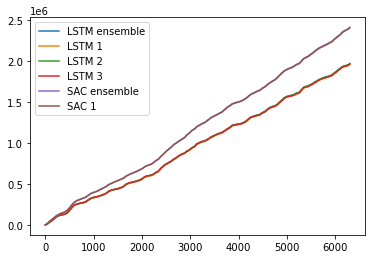

05057200
05120500
05362000
05393500
05291000
05413500
05414000
05399500
05408000
05444000


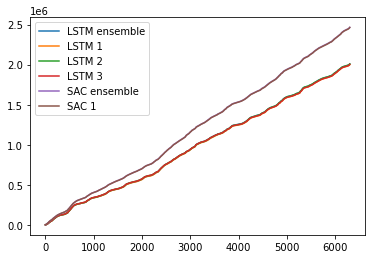

05454000
05458000
05466500
05487980
05489000
05501000
05495500
05495000
05488200
05503800


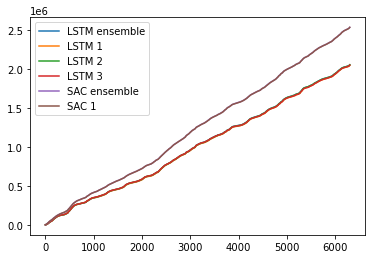

05507600
05525500
05508805
05556500
05591550
05584500
05592050
05593575
05592575
05593900


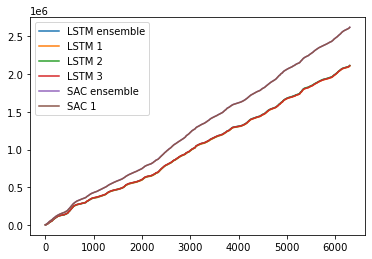

05595730
06221400
06224000
06278300
06280300
06291500
skipping basin 06291500 because of missing observations
06289000
06311000
06332515
06339100
06344600


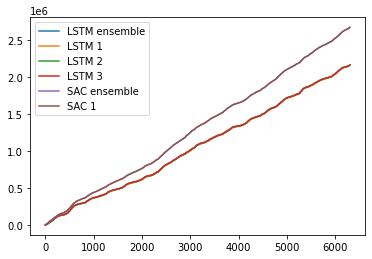

06350000
06352000
06404000
06406000
06440200
06447500
06409000
06431500
06470800
06477500


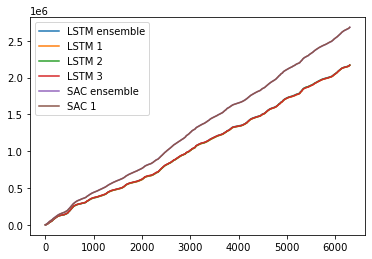

06479215
06601000
06803530
06632400
06614800
06814000
06803510
06746095
06622700
06847900


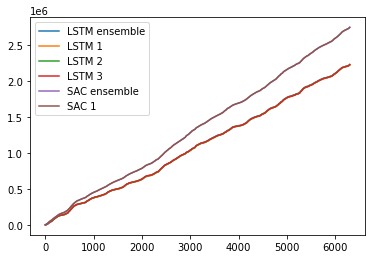

06623800
06853800
06876700
06878000
06879650
06885500
06888500
06889200
06889500
06892000


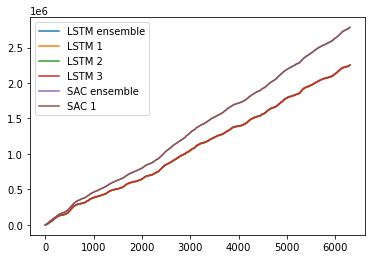

06903400
06906800
06910800
06917000
06911900
06918460
06919500
skipping basin 06919500 because of missing observations
06921070
06921200
07057500
07060710


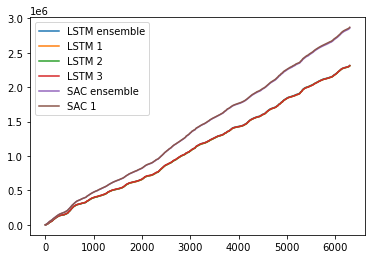

07145700
07066000
07142300
07180500
07083000
07167500
07184000
07195800
07196900
07197000


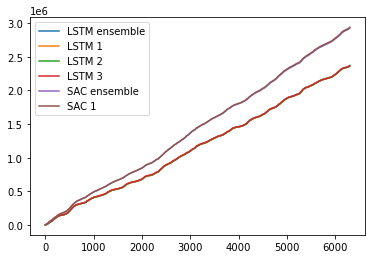

07208500
07261000
07263295
07291000
07315700
07315200
07301410
07299670
07340300
07335700


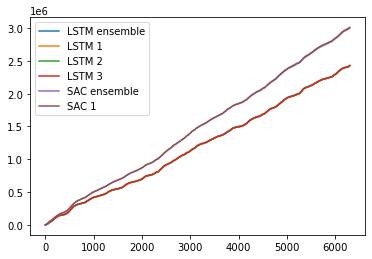

07346045
07359610
07362100
07362587
07375000
08014500
08013000
08023080
08050800
08066300


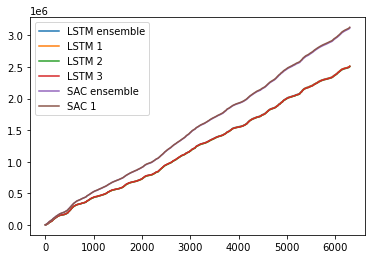

08066200
08070000
08070200
08082700
08086212
08086290
08101000
08103900
08104900
08109700


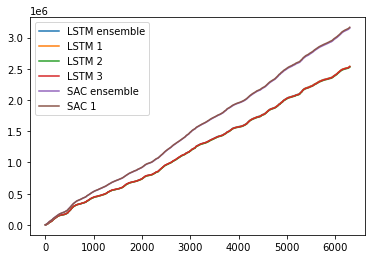

08150800
08158700
08158810
08164300
08164600
08171300
08165300
08175000
08176900
skipping basin 08176900 because of missing observations
08178880
08189500


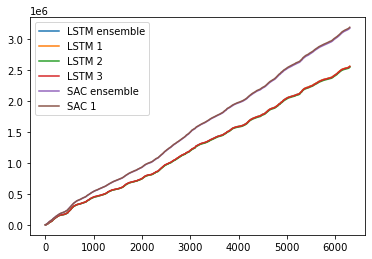

08190000
08195000
08196000
08194200
08190500
08202700
08198500
08200000
08267500
08269000


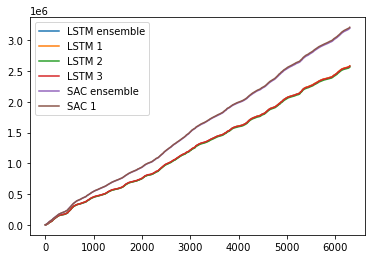

08271000
08324000
08377900
08378500
08380500
09035800
skipping basin 09035800 because of missing observations
09035900
09047700
09066000
09065500
09066300


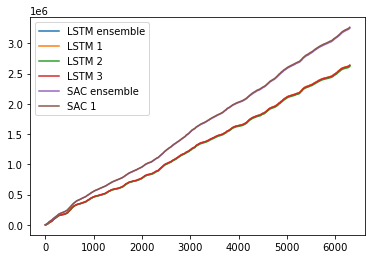

09081600
09066200
09107000
09210500
09223000
09306242
09312600
09386900
09447800
09378170


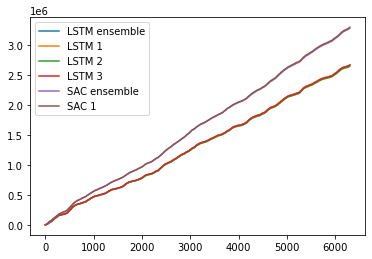

09430600
09484600
09404450
09352900
09492400
09494000
09497980
09505350
09505800
09510200


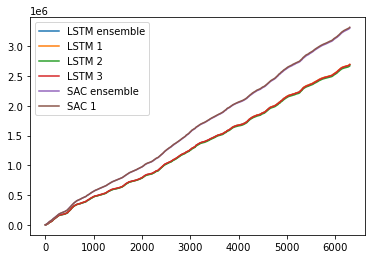

09508300
09513780
09512280
10259000
10244950
10234500
10336645
10336660
10343500
11124500


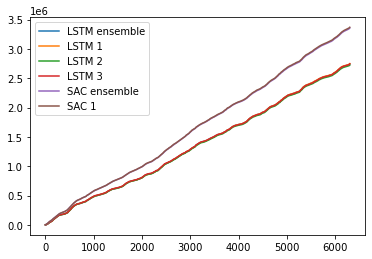

11141280
11143000
11148900
11151300
11176400
11230500
11237500
11264500
11266500
11284400


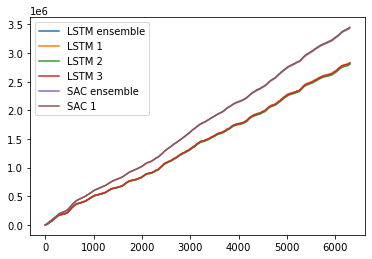

11381500
11451100
11468500
11473900
11475560
11476600
11478500
11480390
11481200
11482500


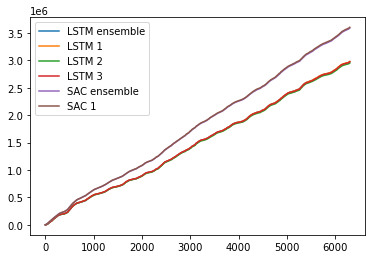

11522500
11528700
11532500
11523200
12010000
12013500
12020000
12025700
12035000
12040500


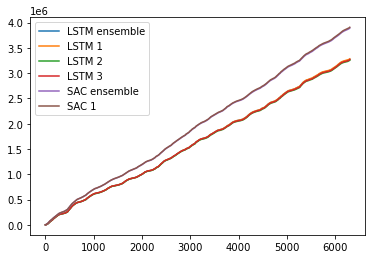

12041200
12056500
12054000
12073500
12048000
12082500
12092000
12114500
12117000
12115000


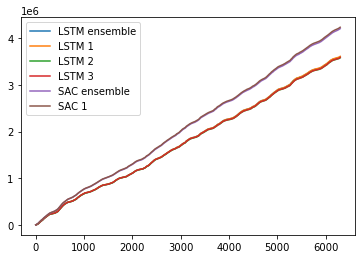

12143600
12144000
12145500
12167000
12147500
12175500
12178100
12186000
12189500
12375900


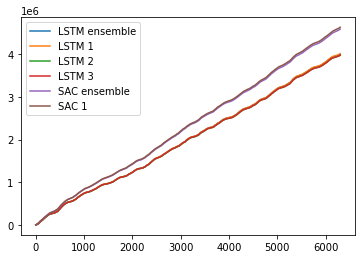

12381400
12377150
12383500
skipping basin 12383500 because of missing observations
12390700
12411000
12447390
12451000
12488500
13011500
13011900
13018300


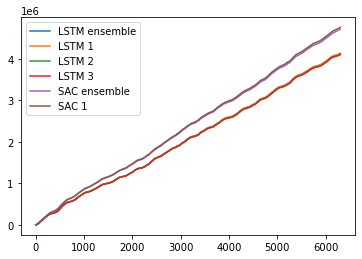

13161500
13023000
13235000
13240000
13313000
13331500
14020000
14096850
14137000
14138870


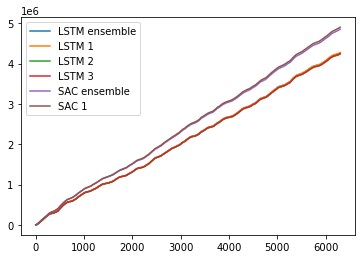

14139800
14138900
14138800
14141500
14154500
14166500
14158790
14185000
14182500
14187000


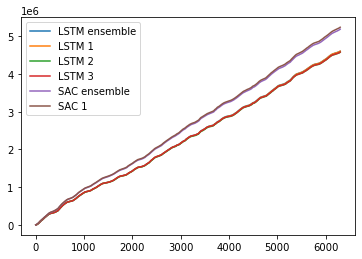

14185900
14216500
14222500
14236200
14301000
14303200
14305500
14306340
14306500
14308990


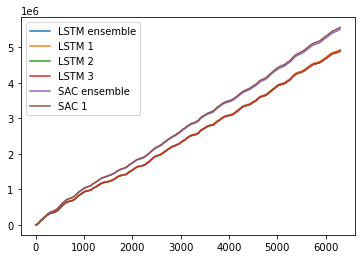

14309500
14316700
14325000
14362250
14400000


In [13]:
flows = ['lstm','obs', 'lstm1', 'lstm2', 'lstm3', 'sac_ens', 'sac_1']
plot_now=0

for forcing_type in ['daymet']:
    
    forcing_dir = '/home/NearingLab/data/camels_data/basin_dataset_public_v1p2/basin_mean_forcing/{}_all_basins_in_one_directory/'.format(forcing_type)
    
    total_mass_error = {'absolute':{flow:[] for flow in flows}, 
                  'positive':{flow:[] for flow in flows}, 
                  'negative':{flow:[] for flow in flows}}

    total_mass = {}

    cumulative_mass_all = {}

    labelz={'nwm':'NWM*', 'lstm':'LSTM', 'mc':'MC-LSTM','sac':'SAC-SMA', 'obs':'Observed'}

    start_date = pd.Timestamp('1996-10-01')
    end_date = pd.Timestamp('2014-01-01')

    first_basin = True

    for basin_0str in basin_list:
        basin_int = int(basin_0str)
        print(basin_0str)

        #-------------------------------------------------------------------------------------------------
        # Reset the total mass to zero for this basin    
        cumulative_mass = {flow:[0] for flow in flows}
        cumulative_mass['precip'] = [0]
        total_mass[basin_0str] = {flow:0 for flow in flows}
        imass=1
        #-------------------------------------------------------------------------------------------------


        #-------------------------------------------------------------------------------------------------
        # We need the basin area to convert to CFS, to interpolate the RI from LPIII
        basin_area = pd_attributes.loc[basin_int, 'area_geospa_fabric']
        basin_str = tools.gauge_id_str(basin_int)
        #-------------------------------------------------------------------------------------------------

        #-------------------------------------------------------------------------------------------------
        # Make dictionary with all the flows
        flow_mm = {}    
        #-------------------------------------------------------------------------------------------------
#         # Get the NWM data for this basin in an xarray dataset.
#         xr_nwm = xr.DataArray(nwm_results[basin_0str]['streamflow'].values, 
#                  coords=[nwm_results[basin_0str]['streamflow'].index], 
#                  dims=['datetime'])
#         # convert from CFS to mm/day
#         # fm3/s * 3600 sec/hour * 24 hour/day / (m2 * mm/m)
#         flow_mm['nwm'] = xr_nwm.loc[start_date:end_date]*3600*24/(basin_area*1000)
        #-------------------------------------------------------------------------------------------------
        # Standard LSTM 
        xrr = lstm_ensemble[basin_0str]['1D']['xr']['QObs(mm/d)_sim'].loc[start_date:end_date]
        flow_mm['lstm'] = pd.DataFrame(data=xrr.values,index=xrr.datetime.values)
        
        xrr = lstm_1[basin_0str]['1D']['xr']['QObs(mm/d)_sim'].loc[start_date:end_date]
        flow_mm['lstm1'] = pd.DataFrame(data=xrr.values,index=xrr.date.values)
        xrr = lstm_2[basin_0str]['1D']['xr']['QObs(mm/d)_sim'].loc[start_date:end_date]
        flow_mm['lstm2'] = pd.DataFrame(data=xrr.values,index=xrr.date.values)
        xrr = lstm_3[basin_0str]['1D']['xr']['QObs(mm/d)_sim'].loc[start_date:end_date]
        flow_mm['lstm3'] = pd.DataFrame(data=xrr.values,index=xrr.date.values)

        #-------------------------------------------------------------------------------------------------
#         # Mass-conserving LSTM data trained on all years
#         xrr = mclstm_results_time_split2[forcing_type][basin_0str]['1D']['xr']['QObs(mm/d)_sim'].loc[start_date:end_date]
#         flow_mm['mc'] = pd.DataFrame(data=xrr.values,index=xrr.date.values)
#         #-------------------------------------------------------------------------------------------------
        # SACSMA Mean
        df = sac_ensemble[basin_0str].loc[start_date:end_date]
        flow_mm['sac_ens'] = df
        df = sac_1[basin_0str].loc[start_date:end_date]
        flow_mm['sac_1'] = df
        #-------------------------------------------------------------------------------------------------
        # OBSERVATIONS
        xrr = lstm_ensemble[basin_0str]['1D']['xr']['QObs(mm/d)_obs'].loc[start_date:end_date]
        flow_mm['obs'] = pd.DataFrame(data=xrr.values,index=xrr.datetime.values)
        #-------------------------------------------------------------------------------------------------
        # FORCING
        forcing = pd.read_csv(forcing_dir+basin_0str+'_lump_cida_forcing_leap.txt', delim_whitespace=True, header=3)
        forcing = forcing.iloc[6118:]
        forcing.index=pd.to_datetime((forcing.Year*10000+forcing.Mnth*100+forcing.Day).apply(str),format='%Y%m%d')
        #-------------------------------------------------------------------------------------------------


        #-------------------------------------------------------------------------------------------------
        # Make sure we are in a time period that all the flow members have values
        # If there is missin observations than we can't compare the mass of the observed with simulaitons
        skip_basin_because_missing_obs = False
        for d in lstm_ensemble[basin_0str]['1D']['xr']['QObs(mm/d)_obs'].datetime:
            if d.values < start_date:
                continue
            if d.values > end_date:
                break
            if np.isnan(flow_mm['obs'].loc[d.values].values[0]):
                skip_basin_because_missing_obs = True
                break
            else:
                #-------------------------------------------------------------------------------------------------
                # Keep track of the cumulative mass and add it to the list
                cumulative_mass['precip'].append(forcing['prcp(mm/day)'].loc[d.values] + \
                                                 cumulative_mass['precip'][imass-1])

                cumulative_mass['obs'].append(flow_mm['obs'].loc[d.values].values[0] + \
                                              cumulative_mass['obs'][imass-1])

#                 cumulative_mass['nwm'].append(flow_mm['nwm'].loc[d.values].values + \
#                                               cumulative_mass['nwm'][imass-1])

                cumulative_mass['lstm'].append(flow_mm['lstm'].loc[d.values].values[0] + \
                                               cumulative_mass['lstm'][imass-1])
                cumulative_mass['lstm1'].append(flow_mm['lstm1'].loc[d.values].values[0] + \
                                               cumulative_mass['lstm1'][imass-1])
                cumulative_mass['lstm2'].append(flow_mm['lstm2'].loc[d.values].values[0] + \
                                               cumulative_mass['lstm2'][imass-1])
                cumulative_mass['lstm3'].append(flow_mm['lstm3'].loc[d.values].values[0] + \
                                               cumulative_mass['lstm3'][imass-1])

#                 cumulative_mass['mc'].append(flow_mm['mc'].loc[d.values].values[0] + \
#                                              cumulative_mass['mc'][imass-1])

                cumulative_mass['sac_ens'].append(flow_mm['sac_ens'].loc[d.values] + \
                                              cumulative_mass['sac_ens'][imass-1])
                cumulative_mass['sac_1'].append(flow_mm['sac_1'].loc[d.values] + \
                                              cumulative_mass['sac_1'][imass-1])    
                imass+=1
                #-------------------------------------------------------------------------------------------------

        #-------------------------------------------------------------------------------------------------
        # If there is missin observations than we can't compare the mass of the observed with simulaitons            
        if skip_basin_because_missing_obs:
            print("skipping basin {} because of missing observations".format(basin_0str))
            continue


        for flow in flows:
            total_mass[basin_0str][flow] = np.nansum(flow_mm[flow].loc[start_date:end_date])

        for flow in flows:
            total_mass_error['absolute'][flow].append(np.abs(total_mass[basin_0str][flow] - \
                                                             total_mass[basin_0str]['obs'])/ \
                                                             total_mass[basin_0str]['obs'])
            if (total_mass[basin_0str][flow] - total_mass[basin_0str]['obs']) > 0:
                total_mass_error['positive'][flow].append((total_mass[basin_0str][flow] - \
                                                           total_mass[basin_0str]['obs'])/ \
                                                           total_mass[basin_0str]['obs'])
                total_mass_error['negative'][flow].append(0)
            else:
                total_mass_error['negative'][flow].append((total_mass[basin_0str][flow] - \
                                                           total_mass[basin_0str]['obs']) / \
                                                           total_mass[basin_0str]['obs'])
                total_mass_error['positive'][flow].append(0)

        # _______________________________________________________________________
        # Keep track of all the cumulative mass through time for each basin
        if first_basin and not skip_basin_because_missing_obs:
            for flow in flows:
                cumulative_mass_all[flow] = np.array(cumulative_mass[flow])
            cumulative_mass_all['precip'] = np.array(cumulative_mass['precip'])
            first_basin = False
        if  not skip_basin_because_missing_obs and not first_basin:
            for flow in flows:
                cumulative_mass_all[flow] += np.array(cumulative_mass[flow])
            cumulative_mass_all['precip'] +=np.array(cumulative_mass['precip'])
            
            
        plot_now+=1
        # _______________________________________________________________________
        # Do test plots, so don't have to wait the whole time.            
        #plt.plot(cumulative_mass_all['precip'])
        if plot_now == 10:
            plt.plot(cumulative_mass_all['lstm'], label='LSTM ensemble')
            plt.plot(cumulative_mass_all['lstm1'], label='LSTM 1')
            plt.plot(cumulative_mass_all['lstm2'], label='LSTM 2')
            plt.plot(cumulative_mass_all['lstm3'], label='LSTM 3')
            plt.plot(cumulative_mass_all['sac_ens'], label='SAC ensemble')
            plt.plot(cumulative_mass_all['sac_1'], label='SAC 1')
            # plt.ylim([3.6e6,5e6])
            # plt.xlim([5000,len(cumulative_mass_all['lstm'])])
            plt.legend()
            plt.show()
            plt.close()
            plot_now=0
            

    # _______________________________________________________________________
    # Save the mass balance results.
    with open('xtest_ensemble_total_mass_error_{}.pkl'.format(forcing_type), 'wb') as fb:
        pkl.dump(total_mass_error, fb)
    with open('xtest_ensemble_total_mass_{}.pkl'.format(forcing_type), 'wb') as fb:
        pkl.dump(total_mass, fb)
    with open('xtest_ensemble_cumulative_mass_all_{}.pkl'.format(forcing_type), 'wb') as fb:
        pkl.dump(cumulative_mass_all, fb)


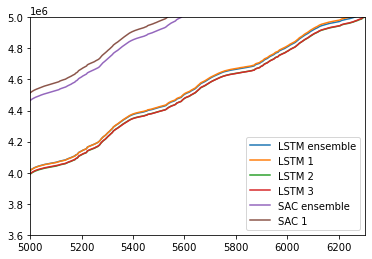

In [14]:
#plt.plot(cumulative_mass_all['precip'])
plt.plot(cumulative_mass_all['lstm'], label='LSTM ensemble')
plt.plot(cumulative_mass_all['lstm1'], label='LSTM 1')
plt.plot(cumulative_mass_all['lstm2'], label='LSTM 2')
plt.plot(cumulative_mass_all['lstm3'], label='LSTM 3')
plt.plot(cumulative_mass_all['sac_ens'], label='SAC ensemble')
plt.plot(cumulative_mass_all['sac_1'], label='SAC 1')
plt.ylim([3.6e6,5e6])
plt.xlim([5000,len(cumulative_mass_all['lstm'])])
plt.legend()
plt.show()
plt.close()